In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False


In [66]:
test_cpi=pd.read_excel(r'C:\Users\yes_truly\Desktop\소비자물가지수.xlsx')
test_cpi
test_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     object 
 1   2012    15 non-null     object 
 2   2013    14 non-null     float64
 3   2014    14 non-null     float64
 4   2015    14 non-null     float64
 5   2016    14 non-null     float64
 6   2017    14 non-null     float64
 7   2018    14 non-null     float64
 8   2019    14 non-null     float64
 9   2020    14 non-null     float64
 10  2021    14 non-null     float64
 11  2022    14 non-null     float64
dtypes: float64(10), object(2)
memory usage: 1.7+ KB


In [5]:
cpi = test_cpi.iloc[0:2, [ 7, 8, 9, 10, 11]]
cpi

,2018,2019,2020,2021,2022
0,99.1,99.5,100.0,102.5,107.7
1,1.5,0.4,0.5,2.5,5.1


In [6]:
cpi_columns=cpi.columns
first_row=cpi.iloc[0]
print(first_row)
second_row=cpi.iloc[1]
print(second_row)

2018     99.1
2019     99.5
2020    100.0
2021    102.5
2022    107.7
Name: 0, dtype: float64
2018    1.5
2019    0.4
2020    0.5
2021    2.5
2022    5.1
Name: 1, dtype: float64


In [26]:
df_cpi = pd.DataFrame([first_row.values, second_row.values],index=["소비자물가 총지수(2020=100)","소비자물가상승률(%)"],columns=cpi.columns)
df_cpi

연도,2018,2019,2020,2021,2022
소비자물가 총지수(2020=100),99.1,99.5,100.0,102.5,107.7
소비자물가상승률(%),1.5,0.4,0.5,2.5,5.1


In [27]:
df_cpi.columns.name='연도'
df_cpi=df_cpi.transpose()
df_cpi

,소비자물가 총지수(2020=100),소비자물가상승률(%)
연도,,
2018,99.1,1.5
2019,99.5,0.4
2020,100.0,0.5
2021,102.5,2.5
2022,107.7,5.1


In [28]:
cyber_crime = pd.read_csv("CyberCrime.csv",index_col=['연도'], thousands = ',',encoding='UTF-8')
cyber_crime = cyber_crime.iloc[::2]
cyber_crime

,구 분,총 계,소계,해킹,DDoS,악성프로그램,기타,소계.1,사이버사기,사이버금융범죄,개인위치정보침해,사이버저작권침해,기타.1,소계.2,사이버성폭력,사이버도박,사이버명예훼손모욕,기타.2
연도,,,,,,,,,,,,,,,,,,
2018,발생,149604,2888,2178,20,119,571,123677,112000,5621,246,3856,1954,23039,3833,3012,15926,268
2019,발생,180499,3638,2664,35,270,669,151916,136074,10542,179,2562,2559,24945,2690,5346,16633,276
2020,발생,234098,4344,3176,25,169,974,199594,174328,20248,241,2183,2594,30160,4831,5692,19388,249
2021,발생,217807,3845,2839,14,157,835,174648,141154,28123,217,2423,2767,39278,4349,5505,28988,436
2022,발생,230355,3494,2396,30,185,883,190958,155715,28546,247,3302,3148,35903,3201,2997,29258,447


In [29]:
cyber_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2018 to 2022
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구 분        5 non-null      object
 1   총 계        5 non-null      int64 
 2   소계         5 non-null      int64 
 3   해킹         5 non-null      int64 
 4   DDoS       5 non-null      int64 
 5   악성프로그램     5 non-null      int64 
 6   기타         5 non-null      int64 
 7   소계.1       5 non-null      int64 
 8   사이버사기      5 non-null      int64 
 9   사이버금융범죄    5 non-null      int64 
 10  개인위치정보침해   5 non-null      int64 
 11  사이버저작권침해   5 non-null      int64 
 12  기타.1       5 non-null      int64 
 13  소계.2       5 non-null      int64 
 14  사이버성폭력     5 non-null      int64 
 15  사이버도박      5 non-null      int64 
 16  사이버명예훼손모욕  5 non-null      int64 
 17  기타.2       5 non-null      int64 
dtypes: int64(17), object(1)
memory usage: 760.0+ bytes


In [33]:
cyber_crime_occur = cyber_crime.iloc[:,[9,15]]
cyber_crime_occur.info()
cyber_crime_occur

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2018 to 2022
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   사이버금융범죄  5 non-null      int64
 1   사이버도박    5 non-null      int64
dtypes: int64(2)
memory usage: 292.0 bytes


,사이버금융범죄,사이버도박
연도,,
2018,5621,3012
2019,10542,5346
2020,20248,5692
2021,28123,5505
2022,28546,2997


In [36]:
cpi_cyber_crime = pd.concat([df_cpi, cyber_crime_occur], axis=1)
cpi_cyber_crime 

,소비자물가 총지수(2020=100),소비자물가상승률(%),사이버금융범죄,사이버도박
연도,,,,
2018,99.1,1.5,5621,3012
2019,99.5,0.4,10542,5346
2020,100.0,0.5,20248,5692
2021,102.5,2.5,28123,5505
2022,107.7,5.1,28546,2997


In [37]:
cpi_cyber_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   소비자물가 총지수(2020=100)  5 non-null      float64
 1   소비자물가상승률(%)          5 non-null      float64
 2   사이버금융범죄              5 non-null      int64  
 3   사이버도박                5 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 372.0+ bytes


In [39]:
cpi_cyber_crime.isnull().sum()

소비자물가 총지수(2020=100)    0
소비자물가상승률(%)            0
사이버금융범죄                0
사이버도박                  0
dtype: int64

In [41]:
cpi_cyber_crime.describe()

#소비자물가상승률은 평균적으로 2%, 사이버 금융범죄 발생은 평균적으로 18616건 발생, 사이버도박은 4510건 발생 확인 가능

,소비자물가 총지수(2020=100),소비자물가상승률(%),사이버금융범죄,사이버도박
count,5.000000,5.000000,5.000000,5.000000
mean,101.760000,2.000000,18616.000000,4510.400000
std,3.574633,1.931321,10316.381076,1380.146478
min,99.100000,0.400000,5621.000000,2997.000000
25%,99.500000,0.500000,10542.000000,3012.000000
50%,100.000000,1.500000,20248.000000,5346.000000
75%,102.500000,2.500000,28123.000000,5505.000000
max,107.700000,5.100000,28546.000000,5692.000000


In [48]:
cpi_cyber_crime.corr(method='pearson')
#사이버 금융범죄의 발생횟수와 소비자물가상숭률, 총지수 모두 양의 상관지수를 가짐
#따라서 소비자물가지수와 사이버금융범죄 간의 양의 상관관계가 있음 

#사이버 도박의 발생횟수와 소비자물가상숭률, 총지수 모두 음의 상관지수를 가짐
#따라서 소비자물가지수와 사이버금융범죄 간의 음의 선형관계가 있음 

,소비자물가 총지수(2020=100),소비자물가상승률(%),사이버금융범죄,사이버도박
소비자물가 총지수(2020=100),1.000000,0.954914,0.786128,-0.417345
소비자물가상승률(%),0.954914,1.000000,0.658800,-0.614743
사이버금융범죄,0.786128,0.658800,1.000000,0.159450
사이버도박,-0.417345,-0.614743,0.159450,1.000000


<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='사이버금융범죄'>

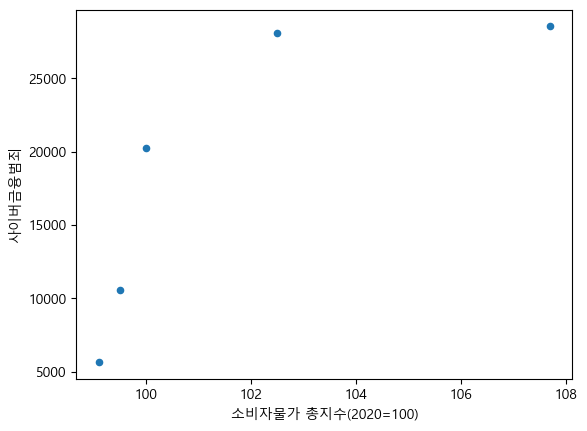

In [62]:
cpi_cyber_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='사이버금융범죄')

<Axes: xlabel='소비자물가상승률(%)', ylabel='사이버금융범죄'>

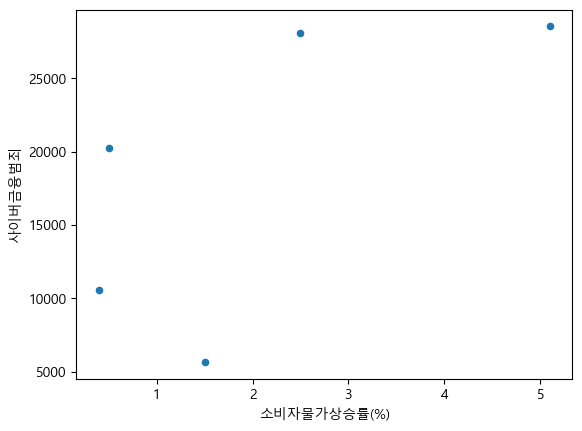

In [63]:
cpi_cyber_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='사이버금융범죄')

<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='사이버도박'>

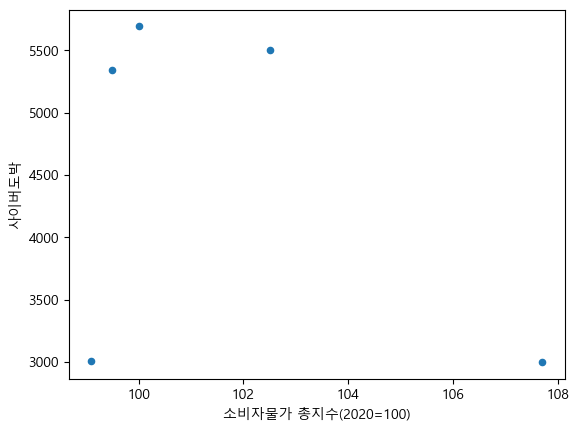

In [64]:
cpi_cyber_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='사이버도박')

<Axes: xlabel='소비자물가상승률(%)', ylabel='사이버도박'>

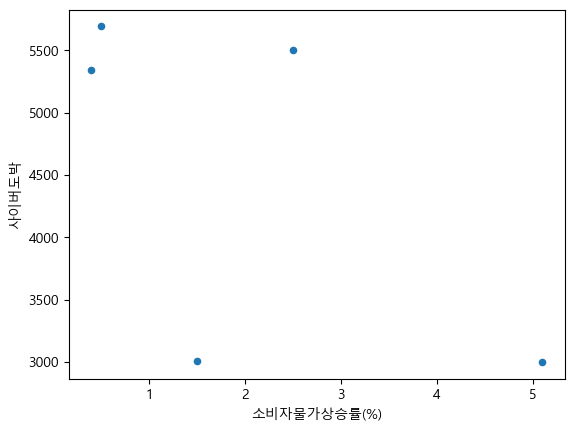

In [65]:
cpi_cyber_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='사이버도박')